In [1]:
pip install scikit-learn-intelex

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install torch==1.13.1 torchvision==0.14.1

Defaulting to user installation because normal site-packages is not writeable
  Using cached torchvision-0.14.1-cp39-cp39-manylinux1_x86_64.whl (24.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install intel-tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install neural-compressor

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
from neural_compressor.config import PostTrainingQuantConfig
from neural_compressor.data import DataLoader
from neural_compressor.data import Datasets

dataset = Datasets('tensorflow')['dummy'](shape=(1, 224, 224, 3))
dataloader = DataLoader(framework='tensorflow', dataset=dataset)

from neural_compressor.quantization import fit


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("visem/csv/sex_hormones.csv", low_memory=False, encoding ='utf8',sep=",")

df.head()

,ID;Seminal plasma anti-Müllerian hormone (AMH) (pmol/L);Serum total testosterone (nmol/L);Serum oestradiol (nmol/L);Serum sex hormone-binding globulin,SHBG (nmol/L);Serum follicle-stimulating hormone,FSH (IU/L);Serum Luteinizing hormone,LH (IU/L);Serum inhibin B (ng/L);Serum anti-Müllerian hormone,AMH (pmol/L)
0,1;64;16,8;0,13;15;2,3;4,2;289;54
1,2;423;15;0,15;43;7,2;2,7;164;19,NaN
2,3;37;8,2;0,18;32;4,2;4,8;67;47
3,4;257;11,2;0,15;11;8,5;5,6;132;29
4,5;2203;11,9;0,14;18;2,6;2,1;139;68


In [5]:
df1 = pd.read_csv("visem/csv/participant_related_data.csv", low_memory=False, encoding ='utf8',sep=",")

df1.head()

,,ID;Abstinence time(days);Body mass index (kg/m²);Age (years)
1;4,0;32,5;36
2;4,0;33,7;61
3;2,0;62,7;51
4;2,5;45,5;38
5;3,0;51,0;33


In [6]:
df2 = pd.read_csv("visem/csv/semen_analysis_data.csv", low_memory=False, encoding ='utf8',sep=",")

df2.head()

,,,,,,,ID;Sperm concentration (x10⁶/mL);Total sperm count (x10⁶);Ejaculate volume (mL);Sperm vitality (%);Normal spermatozoa (%);Head defects (%);Midpiece and neck defects (%);Tail defects (%);Cytoplasmic droplet (%);Teratozoospermia index;Progressive motility (%);Non progressive sperm motility (%);Immotile sperm (%);High DNA stainability,HDS (%);DNA fragmentation index,DFI (%)
1;105,3;363,1;3,5;81;2,0;98,0;11,2;38,0;3,4;1,54;51;19;30;13;29
2;45,4;141,6;3,1;50;3,0;97,0;8,5;24,5;2,0;1,36;22;16;62;13;57
3;50,0;124,5;2,5;90;6,9;90,6;32,8;14,3;1,5;1,51;18;26;56;11;12
4;42,9;103,8;2,4;80;2,8;96,5;24,1;23,1;5,2;1,53;33;26;41;10;15
5;32,8;158,7;4,8;90;3,2;95,0;32,5;15,7;7,0;1,56;43;22;35;21;13


In [7]:
df4 = pd.read_csv("visem/csv/fatty_acids_serum.csv", low_memory=False, encoding ='utf8',sep=",")

df4.head()

,,,,,,,,,,ID;Serum C14:0 (myristic acid);Serum C16:0 (palmitic acid);Serum C16:1 (palmitoleic acid);Serum C18:0 (stearic acid);Serum C18:1 n-9 (oleic acid);Serum total C18:1;Serum C18:2 n-6 (linoleic acid,LA);Serum C18:3 n-6 (gamma-linoleic acid,GLA);Serum C20:1 n-9;Serum C20:2 n-6;Serum C20:3 n-6;Serum C20:4 n-6;Serum C20:5 n-3 (eicosapentaenoic acid,EPA);Serum C22:5 n-3 (docosapentaenoic acid,DPA);Serum C22:6 n-3 (docosahexaenoic acid,DHA)
1;0,36;29,72;0,64;13,67;9,00;10,90;19,48;0,30;0,16;0,31;3,37;12,07;2,15;1,35;5,53
2;0,28;31,22;0,47;11,84;9,02;11,29;20,34;0,22;0,25;0,26;2,06;11,64;2,80;1,04;6,31
3;0,36;27,95;0,47;16,57;8,65;10,36;23,75;0,26;0,19;0,35;3,10;7,37;1,95;0,98;6,34
4;0,32;28,10;0,64;16,09;8,56;10,13;21,52;0,17;0,11;0,31;4,41;12,09;1,56;1,32;3,23
5;0,40;29,94;0,80;14,17;9,47;11,02;22,29;0,38;0,15;0,29;4,33;8,61;1,73;1,58;4,31


In [11]:
df.columns.tolist()

['ID;Seminal plasma anti-Müllerian hormone (AMH) (pmol/L);Serum total testosterone (nmol/L);Serum oestradiol (nmol/L);Serum sex hormone-binding globulin',
 ' SHBG (nmol/L);Serum follicle-stimulating hormone',
 ' FSH (IU/L);Serum Luteinizing hormone',
 ' LH (IU/L);Serum inhibin B (ng/L);Serum anti-Müllerian hormone',
 ' AMH (pmol/L)']

In [9]:
df = df.rename(columns={'Seminal plasma anti-Müllerian hormone (AMH) (pmol/L)':'amh', 'Serum total testosterone (nmol/L)': 'testosterone', 'Serum oestradiol (nmol/L)': 'oestradiol', 'Serum sex hormone-binding globulin, SHBG (nmol/L)': 'shbg', 'Serum follicle-stimulating hormone, FSH (IU/L)': 'fsh', 'Serum Luteinizing hormone, LH (IU/L)': 'lh', 'Serum inhibin B (ng/L)': 'inhibinB', 'Serum anti-Müllerian hormone, AMH (pmol/L)': 'serumAMH', 'ID': 'id'})

In [2]:
df2 = pd.read_csv("visem/csv/semen_analysis_data.csv", low_memory=False, encoding ='utf8',sep=",")

df2.head()

,,,,,,,ID;Sperm concentration (x10⁶/mL);Total sperm count (x10⁶);Ejaculate volume (mL);Sperm vitality (%);Normal spermatozoa (%);Head defects (%);Midpiece and neck defects (%);Tail defects (%);Cytoplasmic droplet (%);Teratozoospermia index;Progressive motility (%);Non progressive sperm motility (%);Immotile sperm (%);High DNA stainability,HDS (%);DNA fragmentation index,DFI (%)
1;105,3;363,1;3,5;81;2,0;98,0;11,2;38,0;3,4;1,54;51;19;30;13;29
2;45,4;141,6;3,1;50;3,0;97,0;8,5;24,5;2,0;1,36;22;16;62;13;57
3;50,0;124,5;2,5;90;6,9;90,6;32,8;14,3;1,5;1,51;18;26;56;11;12
4;42,9;103,8;2,4;80;2,8;96,5;24,1;23,1;5,2;1,53;33;26;41;10;15
5;32,8;158,7;4,8;90;3,2;95,0;32,5;15,7;7,0;1,56;43;22;35;21;13


In [3]:
df2.isnull().sum()

ID;Sperm concentration (x10⁶/mL);Total sperm count (x10⁶);Ejaculate volume (mL);Sperm vitality (%);Normal spermatozoa (%);Head defects (%);Midpiece and neck defects (%);Tail defects (%);Cytoplasmic droplet (%);Teratozoospermia index;Progressive motility (%);Non progressive sperm motility (%);Immotile sperm (%);High DNA stainability    0
 HDS (%);DNA fragmentation index                                                                                                                                                                                                                                                                                                                 0
 DFI (%)                                                                                                                                                                                                                                                                                                                          

In [4]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 709.9 kB/s eta 0:00:00 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install keras 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install keras.optimizer_v1

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement keras.optimizer_v1 (from versions: none)
ERROR: No matching distribution found for keras.optimizer_v1
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install adam

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 1.1 MB/s eta 0:00:0000:0100:04
Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/home/u187765/tmp/pip-install-yyw0h9i6/tensorflow-gpu_fa86a4cf1c844577a329e83e9d30cd20/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  

In [20]:
from tensorflow.keras.optimizers import Adam

In [22]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

np.random.seed(11)
import warnings
warnings.filterwarnings('ignore')

from pandas import DataFrame
from sklearn.tree import plot_tree

import keras
import tensorflow as tf
from PIL import Image
import cv2

from tqdm import tqdm
from random import shuffle 

import os
import random as rn
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical 

# specifically for cnn
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, Conv1D, MaxPooling2D, BatchNormalization,MaxPool1D,MaxPool2D

#preprocess.
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow.keras.optimizers import Adam

In [40]:
X=[] #contient les images
Z=[] #contient les labels pour chaque image
IMG_SIZE=224  #taille de l'image
#chemins des images pour chaque classe
DIR0='visem 0.2/visem tracking/visem_tracking_train_v4/Train/11/images'
#DIR1='../input/visemtracking/VISEM_Tracking_Train_v3/Train/21/images'
#DIR2='../input/visemtracking/VISEM_Tracking_Train_v3/Train/82/images'

In [41]:
def assign_label(img,DIR_type):
    return DIR_type

In [42]:
def make_train_data(DIR_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,DIR_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [43]:
make_train_data("11",DIR0)
print(len)

100%|██████████| 1448/1448 [00:06<00:00, 236.21it/s]

<built-in function len>


In [48]:
X=[] #contient les images
Z=[] #contient les labels pour chaque image
IMG_SIZE=224  #taille de l'image
#chemins des images pour chaque classe
#DIR0='visem 0.2/visem tracking/visem_tracking_train_v4/Train/11/images'
DIR1='visem 0.2/visem tracking/visem_tracking_train_v4/Train/21/images'
#DIR2='../input/visemtracking/VISEM_Tracking_Train_v3/Train/82/images'

In [49]:
def assign_label(img,DIR_type):
    return DIR_type

In [50]:
def make_train_data(DIR_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,DIR_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [51]:
make_train_data("21",DIR1)
print(len(X))

100%|██████████| 1470/1470 [00:35<00:00, 41.67it/s]

1470


In [52]:
X=[] #contient les images
Z=[] #contient les labels pour chaque image
IMG_SIZE=224  #taille de l'image
#chemins des images pour chaque classe
#DIR0='visem 0.2/visem tracking/visem_tracking_train_v4/Train/11/images'
#DIR1='visem 0.2/visem tracking/visem_tracking_train_v4/Train/21/images'
DIR2='visem 0.2/visem tracking/visem_tracking_train_v4/Train/82/image'

In [53]:
def assign_label(img,DIR_type):
    return DIR_type

In [54]:
def make_train_data(DIR_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,DIR_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        X.append(np.array(img))
        Z.append(str(label))

In [56]:
make_train_data("82",DIR2)
print(len(X))

100%|██████████| 1432/1432 [00:27<00:00, 51.88it/s]

2902


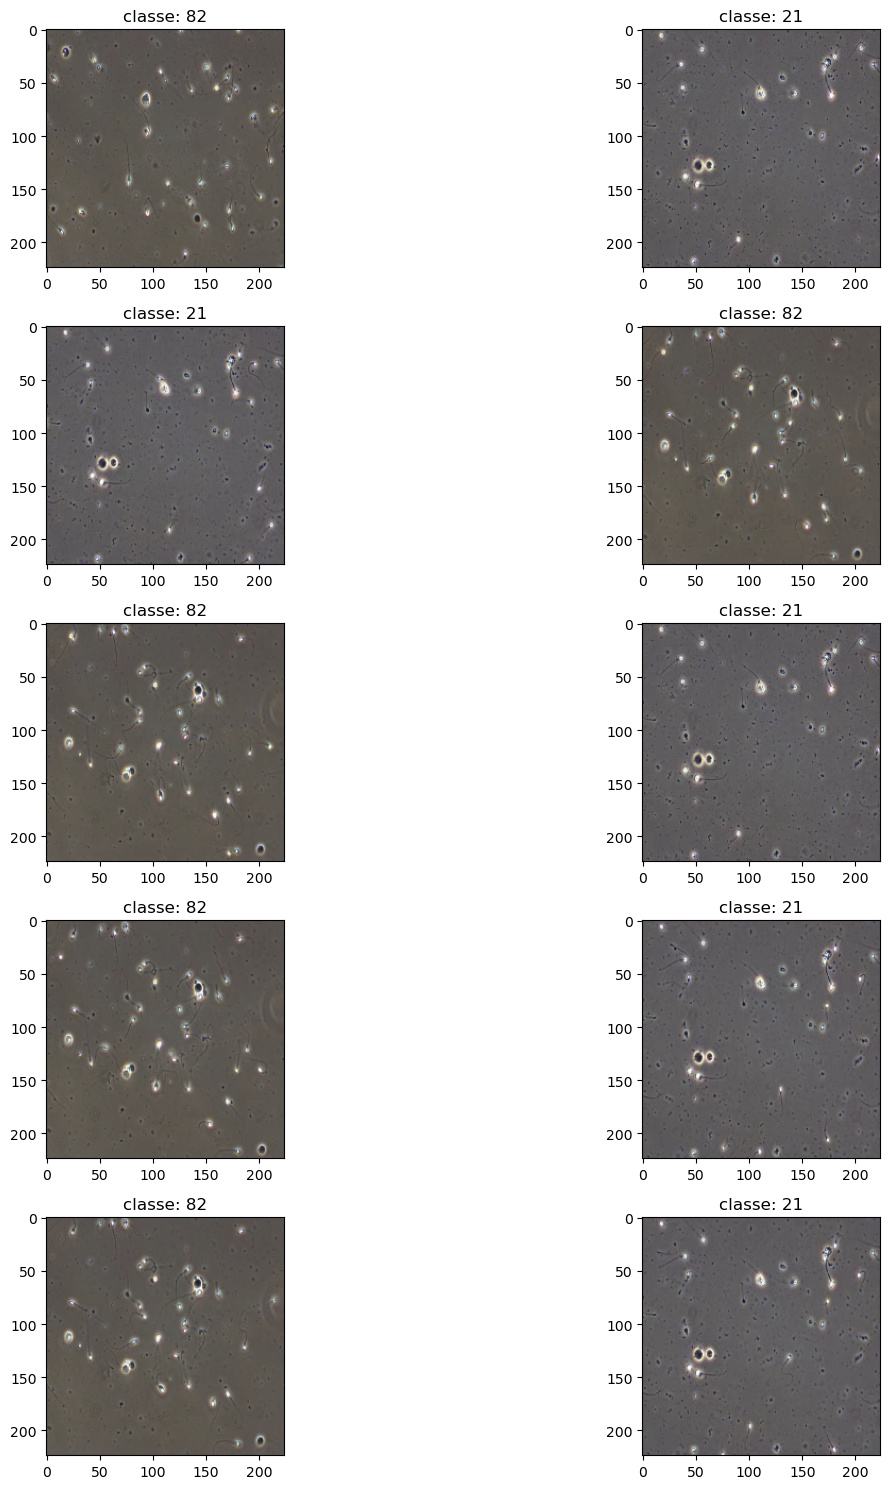

In [57]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('classe: '+Z[l])
        
plt.tight_layout()

In [58]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,3) #convertir les images en un array de pixels 
X=np.array(X)
X=X/255 #standardiser les images

21
[1. 0. 0.]


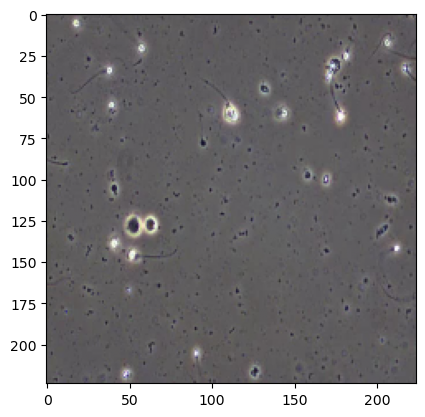

In [59]:
print(Z[90])
plt.imshow(X[90])
print(Y[90])

In [60]:
#split data (train and test)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=2) 

In [61]:
np.random.seed(42)
rn.seed(42)

In [62]:
# # modelling starts using a CNN.

m = Sequential()

m.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (IMG_SIZE, IMG_SIZE, 3)))
m.add(MaxPooling2D(pool_size=(2,2)))
m.add(Dropout(0.25))
m.add(Conv2D(filters =32, kernel_size = (3,3),padding = 'Same',activation ='relu'))
m.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

m.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
m.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
m.add(Dropout(0.25))

m.add(Conv2D(filters =64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
m.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


m.add(Flatten())
m.add(Dense(units = 512, activation='relu'))
m.add(Dense(3, activation = "softmax"))

2023-06-02 07:00:04.061576: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 


In [63]:
m.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [64]:
history=m.fit(x_train, y_train, epochs=40, batch_size=32)

Epoch 1/30
68/68 [==============================] - 30s 393ms/step - loss: 0.1787 - accuracy: 0.9012
Epoch 2/30
68/68 [==============================] - 26s 383ms/step - loss: 2.4536e-06 - accuracy: 1.0000
Epoch 3/30
68/68 [==============================] - 26s 386ms/step - loss: 1.9672e-07 - accuracy: 1.0000
Epoch 4/30
68/68 [==============================] - 26s 387ms/step - loss: 1.2879e-07 - accuracy: 1.0000
Epoch 5/30
68/68 [==============================] - 26s 385ms/step - loss: 8.4202e-08 - accuracy: 1.0000
Epoch 6/30
68/68 [==============================] - 26s 378ms/step - loss: 7.9217e-08 - accuracy: 1.0000
Epoch 7/30
68/68 [==============================] - 26s 386ms/step - loss: 5.0619e-08 - accuracy: 1.0000
Epoch 8/30
68/68 [==============================] - 26s 385ms/step - loss: 2.6789e-08 - accuracy: 1.0000
Epoch 9/30
68/68 [==============================] - 27s 393ms/step - loss: 2.7501e-08 - accuracy: 1.0000
Epoch 10/30
68/68 [==============================] - 26s 38

In [65]:
m.evaluate(x_test,y_test)

23/23 [==============================] - 2s 90ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

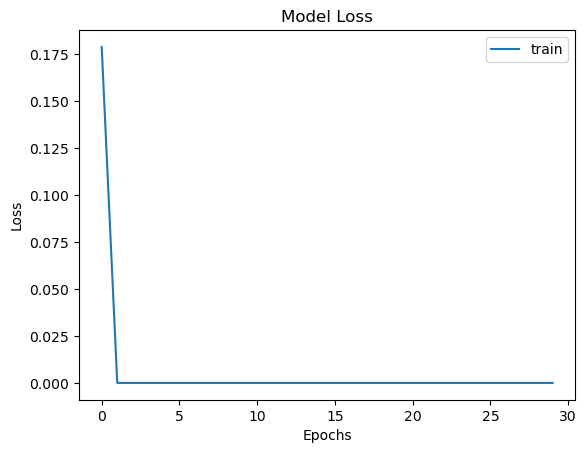

In [66]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

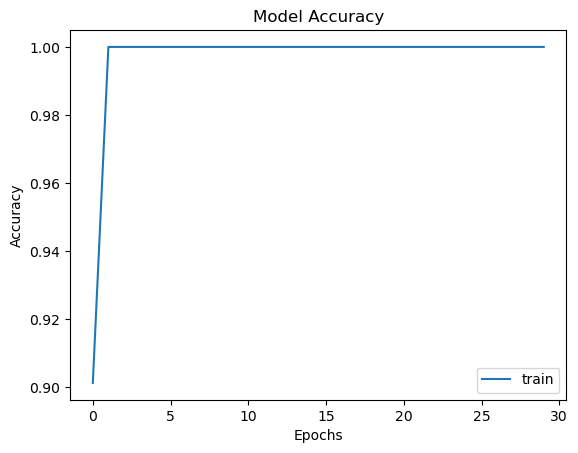

In [67]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [68]:
def evaluate_prediction(i):
  labels = ["11","11","train"]
  if i in range(0,len(y_test)):
    pred=m.predict(x_test[i].reshape(-1,224,224,3))
    pred_arg=np.argmax(pred)
    plt.imshow(x_test[i])
    plt.title("Predicted class : "+labels[pred_arg]+"\n"+
          "Actual class : "+labels[np.argmax(y_test[i])])
  else :
    print("out of range of test data !!!")

1/1 [==============================] - 0s 121ms/step


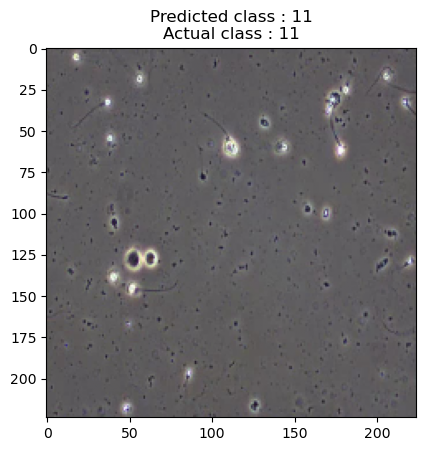

In [69]:
evaluate_prediction(2)